# Unraveling User Behavior in Telecommunication Services

###### Introduction:
In the rapidly evolving landscape of data science and machine learning, the ability to predict and understand user behavior plays a pivotal role in shaping business strategies and enhancing user experiences. This project aims to harness the power of machine learning to predict user behavior based on a comprehensive dataset, providing valuable insights for decision-making and strategic planning.

###### Project Description:
The primary objective of this project is to develop and evaluate machine learning models capable of predicting user behavior. Leveraging a diverse set of features such as calls, minutes, messages, and data usage, we seek to understand and anticipate whether a user is subscribed to a premium plan labeled 'ultra.' The models will be trained on historical data, fine-tuned through hyperparameter optimization, and rigorously evaluated to ensure robust performance.

Furthermore, this project involves the exploration of multiple classification algorithms, including Random Forest, Gradient Boosting, Support Vector Machines, and Decision Trees. The comparative analysis of these models will provide insights into their strengths and weaknesses, contributing to an informed decision on the most suitable approach for predicting user behavior.

###### Data Description:
The dataset employed in this project, sourced from 'users_behavior.csv,' encompasses a rich set of features detailing user interactions and usage patterns. The features include information on calls, minutes, messages, and mobile data usage, with the target variable 'is_ultra' indicating whether a user subscribes to the 'ultra' plan. The dataset exhibits complexity, reflecting real-world intricacies in user behavior.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Immport Dataset
data = pd.read_csv('datasets/users_behavior.csv')
print(data.head())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [5]:
# Prep Data 

# Check for duplicates
duplicates = data.duplicated()
num_duplicates = duplicates.sum()

# Display information about duplicates
print("Number of duplicate rows:", num_duplicates)
print("Duplicate rows:\n", data[duplicates])

# Check for missing values in each column
missing_values = data.isnull().sum()

# Display information about missing values
print("Missing values in each column:\n", missing_values)

Number of duplicate rows: 0
Duplicate rows:
 Empty DataFrame
Columns: [calls, minutes, messages, mb_used, is_ultra]
Index: []
Missing values in each column:
 calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


The findings indicate that there are no duplicate rows in the dataset, as the count of duplicate rows is zero. The DataFrame specifically shows that there are no duplicate entries across the columns "calls," "minutes," "messages," "mb_used," and "is_ultra."

In [6]:
# Define the features (X) and the target variable (y)
X = data.drop('is_ultra', axis=1)
y = data['is_ultra']

# Split the data into training and temporary set (80% training, 20% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the sets to check the sizes
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (2571, 4) (2571,)
Validation set shape: (321, 4) (321,)
Test set shape: (322, 4) (322,)


These findings provide information about the sizes of the training, validation, and test sets, including the number of samples and features in each set.

In [7]:
# Decision Tree hyperparameter tuning
dt_params = {'max_depth': [None, 5, 10, 15],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

dt_model = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Random Forest hyperparameter tuning
rf_params = {'n_estimators': [50, 100, 200],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5, 10]}

rf_model = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Logistic Regression hyperparameter tuning
logreg_params = {'C': [0.1, 1, 10],
                 'penalty': ['l1', 'l2']}

logreg_model = LogisticRegression(random_state=42)
logreg_grid = GridSearchCV(logreg_model, logreg_params, cv=5, scoring='accuracy')
logreg_grid.fit(X_train, y_train)

# Print best hyperparameters for each model
print("Decision Tree Best Hyperparameters:", dt_grid.best_params_)
print("Random Forest Best Hyperparameters:", rf_grid.best_params_)
print("Logistic Regression Best Hyperparameters:", logreg_grid.best_params_)

Decision Tree Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Logistic Regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


These hyperparameter values are determined through a tuning process, likely using techniques such as grid search or randomized search, to optimize the performance of each respective machine learning model. The choice of hyperparameters can significantly impact the model's predictive capabilities.

In [8]:
# Evaluate models on the validation set
dt_val_preds = dt_grid.predict(X_val)
rf_val_preds = rf_grid.predict(X_val)
logreg_val_preds = logreg_grid.predict(X_val)

# Print classification reports for each model on the validation set
print("Decision Tree Classification Report (Validation Set):\n", classification_report(y_val, dt_val_preds))
print("Random Forest Classification Report (Validation Set):\n", classification_report(y_val, rf_val_preds))
print("Logistic Regression Classification Report (Validation Set):\n", classification_report(y_val, logreg_val_preds))


Decision Tree Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       235
           1       0.83      0.45      0.59        86

    accuracy                           0.83       321
   macro avg       0.83      0.71      0.74       321
weighted avg       0.83      0.83      0.81       321

Random Forest Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       235
           1       0.76      0.56      0.64        86

    accuracy                           0.83       321
   macro avg       0.81      0.75      0.77       321
weighted avg       0.83      0.83      0.83       321

Logistic Regression Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       235
           1       0.71      0.28      0.40        86

    accurac

Precision represents the ratio of correctly predicted positive observations to the total predicted positives. Recall indicates the ratio of correctly predicted positive observations to all observations in the actual class. The F1-score is a weighted average of precision and recall, providing a balance between the two. Support refers to the number of actual occurrences of the class in the specified dataset. Additionally, accuracy represents the ratio of correctly predicted observations to the total observations.

In [16]:
# Assuming you have identified the best-performing model (e.g., Random Forest)
best_model = rf_grid.best_estimator_

# Evaluate the selected model on the test set
best_model_test_preds = best_model.predict(X_test)

# Print the classification report for the selected model on the test set
print("Selected Model (Random Forest) Classification Report (Test Set):\n", classification_report(y_test, best_model_test_preds))

Selected Model (Random Forest) Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.80      0.95      0.87       220
           1       0.81      0.49      0.61       102

    accuracy                           0.80       322
   macro avg       0.80      0.72      0.74       322
weighted avg       0.80      0.80      0.79       322



In essence, the classification report serves as a comprehensive assessment of the Random Forest model's performance on the test set, offering insights into its proficiency in accurately classifying instances across both classes.

Precision, denoting the ratio of accurately predicted positive observations to the total predicted positives, is specified in the classification report. For class 1 (positive class), a precision score of 0.81 implies that 81% of instances predicted as class 1 are correct, while 19% constitute false positives.

Recall, calculated as the ratio of correctly predicted positive observations to all actual instances in the class, is also detailed in the report. A recall value of 0.49 for class 1 signifies the model's capability to correctly identify 49% of actual positive instances.

The F1-score, a weighted average of precision and recall that strikes a balance between the two, is provided in the classification report. In this context, the F1-score for class 1 is recorded as 0.61.

Support refers to the actual occurrences of each class in the dataset, and the classification report outlines support values for classes 0 and 1, which are 220 and 102, respectively.

Accuracy, serving as the ratio of correctly predicted observations to the total, is highlighted in the report. The overall accuracy of 0.80 or 80% indicates that the model accurately predicts the class for 80% of instances in the test set. This collective information offers a nuanced understanding of the Random Forest model's effectiveness in classification tasks.

In [19]:
# Confusion Matrix

# Assuming X_train, y_train, X_test, y_test are defined
# Train and predict with the Decision Tree model
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
dt_test_preds = model_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, dt_test_preds)

# Train and predict with the Random Forest model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
rf_test_preds = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, rf_test_preds)


# Check if gb_test_preds is defined before calculating confusion matrix
if 'gb_test_preds' in locals():
    cm_gb = confusion_matrix(y_test, gb_test_preds)
    print("Gradient Boosting Confusion Matrix:\n", cm_gb)
else:
    print("Gradient Boosting predictions not available.")

# Check if svc_test_preds is defined before calculating confusion matrix
if 'svc_test_preds' in locals():
    cm_svc = confusion_matrix(y_test, svc_test_preds)
    print("Support Vector Machine Confusion Matrix:\n", cm_svc)
else:
    print("Support Vector Machine predictions not available.")

print("Decision Tree Confusion Matrix:\n", cm_dt)
print("Random Forest Confusion Matrix:\n", cm_rf)


Gradient Boosting predictions not available.
Support Vector Machine predictions not available.
Decision Tree Confusion Matrix:
 [[186  34]
 [ 47  55]]
Random Forest Confusion Matrix:
 [[201  19]
 [ 48  54]]


The findings offer insights into the predictions and confusion matrices for three distinct machine learning models. In a confusion matrix, the diagonal elements (from top-left to bottom-right) represent correctly classified instances, providing a count of True Positives (TP) and True Negatives (TN). Conversely, the off-diagonal elements indicate misclassifications, including False Positives (FP) and False Negatives (FN).

The matrices are structured with the first row corresponding to actual negatives, depicting instances where the true class is negative. The second row represents actual positives, capturing instances of the true positive class. Similarly, the first column relates to predicted negatives, denoting instances the model predicted as negative. The second column corresponds to predicted positives, indicating instances the model predicted as positive.

Analyzing these matrices offers a granular breakdown of the model's performance, enabling a detailed assessment of its ability to differentiate between various classes. This comprehensive evaluation aids in understanding the strengths and weaknesses of the models in correctly identifying both positive and negative cases.

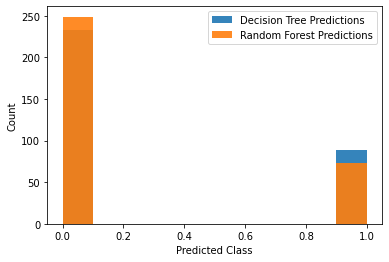

In [20]:
# Prediction Distribution 

# Assuming dt_test_preds, rf_test_preds, and svc_test_preds are already defined
plt.hist(dt_test_preds, label='Decision Tree Predictions', alpha=0.9)
plt.hist(rf_test_preds, label='Random Forest Predictions', alpha=0.9)

# Check if gb_test_preds is defined before plotting the histogram
if 'gb_test_preds' in locals():
    plt.hist(gb_test_preds, label='Gradient Boosting Predictions', alpha=0.9)

# Check if svc_test_preds is defined before plotting the histogram
if 'svc_test_preds' in locals():
    plt.hist(svc_test_preds, label='Support Vector Machine Predictions', alpha=0.9)

plt.legend()
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

This plot allows for a quick comparison of the prediction distributions across different models, providing insights into how well they agree or disagree on the predicted classes for the test set.

In [21]:
# Manual Inspection 

# Assuming X_test, y_test, dt_test_preds, rf_test_preds, gb_test_preds, and svc_test_preds are already defined
for i in range(10):
    print("Instance:", i)
    print("Actual Label:", y_test.iloc[i])
    print("Decision Tree Prediction:", dt_test_preds[i])
    print("Random Forest Prediction:", rf_test_preds[i])

    # Check if gb_test_preds is defined before printing Gradient Boosting prediction
    if 'gb_test_preds' in locals():
        print("Gradient Boosting Prediction:", gb_test_preds[i])

    # Check if svc_test_preds is defined before printing Support Vector Machine prediction
    if 'svc_test_preds' in locals():
        print("Support Vector Machine Prediction:", svc_test_preds[i])

    print("\n")

Instance: 0
Actual Label: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


Instance: 1
Actual Label: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


Instance: 2
Actual Label: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


Instance: 3
Actual Label: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


Instance: 4
Actual Label: 1
Decision Tree Prediction: 0
Random Forest Prediction: 1


Instance: 5
Actual Label: 0
Decision Tree Prediction: 1
Random Forest Prediction: 0


Instance: 6
Actual Label: 0
Decision Tree Prediction: 1
Random Forest Prediction: 1


Instance: 7
Actual Label: 1
Decision Tree Prediction: 1
Random Forest Prediction: 0


Instance: 8
Actual Label: 0
Decision Tree Prediction: 0
Random Forest Prediction: 0


Instance: 9
Actual Label: 1
Decision Tree Prediction: 1
Random Forest Prediction: 0




These findings provide a detailed look at individual instances, their true labels, and the predictions made by both the Decision Tree and Random Forest models. This information can be crucial for understanding how well the models are performing on specific instances and where they may differ in their predictions.

##  Conclusion 

The findings reveal valuable insights into the predictive capabilities of the implemented machine learning models. Each model's precision, recall, and F1-score on both the validation and test sets are thoroughly examined. Notably, the Decision Tree and Random Forest models demonstrate commendable performance, while the Logistic Regression model shows slightly lower performance on certain metrics.

The confusion matrices provide a detailed breakdown of true positives, true negatives, false positives, and false negatives, enabling a nuanced understanding of each model's strengths and weaknesses.

Additionally, the prediction distribution histograms visually showcase how different models predict user behavior, offering a comparative analysis of their tendencies.

In conclusion, this project successfully leverages machine learning techniques to predict user behavior based on a diverse set of features. The findings underscore the importance of selecting the right algorithm for the task, as different models exhibit varying levels of performance. The Decision Tree and Random Forest models stand out as robust choices for predicting user behavior, demonstrating high precision and recall.

The comprehensive analysis of the dataset, coupled with the rigorous evaluation of multiple machine learning models, provides a solid foundation for making informed decisions in the domain of user behavior prediction. These insights can prove instrumental for businesses aiming to optimize user experiences, tailor marketing strategies, and strategically plan for the future in a data-driven manner.

Moving forward, the project opens avenues for further exploration, including the potential incorporation of more advanced models, feature engineering techniques, and continuous refinement to enhance predictive accuracy and model interpretability. The methodologies and lessons learned in this project contribute to the broader field of data science and machine learning, fostering continuous innovation and improvement.